In [208]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

In [ ]:
# About the data
#
# Time:
# These are flow vectors for time T 1 to 100.
# Thus, for example, 1u.csv gives data at a time coordinate of 0 hours. 
#
# Depth:
# This is the average flow from a depth near the surface to the shallower of either the bottom or 400m.
# 
# U component:
# *u.csv contains the horizontal components of the vectors.
#
# V Component: 
# *v.csv contains the vertical components of the vectors.
#
# Spacing:
# The grid spacing is 3 km.
# The matrix index (0, 0) is the bottom left of the plot.
#
# X-axis:
# The columns of the u & v component csv represent the x-axis & correspond to the horizontal direction.
#
# Y-axis:
# The rows of the u & v component csv represent the y-axis & correspond to the vertical direction.
#
# The magnitude is represented by the square-root of the squares of the sum of the squares of the u and v components.
#



In [209]:
# Convert to list and sort
def sort_key(filename):
    # Extract numeric and character parts
    import re
    match = re.search(r'OceanFlow/(\d+)([uv])\.csv', filename)
    if match:
        number = int(match.group(1))
        letter = match.group(2)
        return (number, letter)
    return (0, '')  # fallback for unexpected patterns

In [210]:
f_dir = "OceanFlow/"

In [211]:
data_f_list = glob(f_dir + "*.csv")

In [212]:
data_f_list[data_f_list.index("OceanFlow/24u.csv")]

'OceanFlow/24u.csv'

In [213]:
pd.read_csv(data_f_list[data_f_list.index("OceanFlow/24u.csv")]).head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554
0,0,0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0,0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0,0,0.0,-0.32457,-0.64898,-0.64866,-0.61215,-0.53947,-0.46677,-0.43496,...,0.17095,0.15465,0.14011,0.12556,0.11298,0.10237,0.091759,0.072045,0.043235,0.014416
3,0,0,0.0,-0.33180,-0.66394,-0.66464,-0.63930,-0.58794,-0.53657,-0.50863,...,0.18297,0.16755,0.15221,0.13688,0.12077,0.10389,0.087006,0.065470,0.026188,0.000000
4,0,0,0.0,-0.33903,-0.67892,-0.68063,-0.66645,-0.63641,-0.60636,-0.58231,...,0.19498,0.18044,0.16432,0.14819,0.12855,0.10541,0.082260,0.058901,0.023561,0.000000


In [214]:
pd.read_csv(data_f_list[data_f_list.index("OceanFlow/24v.csv")]).head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554
0,0,0,0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
1,0,0,0,0.0,-0.34736,-0.34283,-0.34136,-0.34297,-0.34458,-0.34404,...,0.11664,0.10616,0.099163,0.092168,0.091746,0.097901,0.10406,0.08929,0.053591,0.017871
2,0,0,0,0.0,-0.70380,-0.69720,-0.69469,-0.69628,-0.69786,-0.69459,...,0.24085,0.22059,0.207130,0.193670,0.192410,0.203360,0.21432,0.18317,0.109930,0.017871
3,0,0,0,0.0,-0.72196,-0.72030,-0.71863,-0.71695,-0.71527,-0.70760,...,0.25597,0.23714,0.224730,0.212330,0.210240,0.218480,0.22672,0.19237,0.115440,0.000000
4,0,0,0,0.0,-0.74011,-0.74339,-0.74256,-0.73762,-0.73268,-0.72061,...,0.27110,0.25369,0.242340,0.230990,0.228070,0.233590,0.23912,0.20158,0.120960,0.000000


In [29]:
data_f_list_sorted = sorted(data_f_list, key=sort_key)

In [30]:
data_f_list_sorted

['OceanFlow/mask.csv',
 'OceanFlow/1u.csv',
 'OceanFlow/1v.csv',
 'OceanFlow/2u.csv',
 'OceanFlow/2v.csv',
 'OceanFlow/3u.csv',
 'OceanFlow/3v.csv',
 'OceanFlow/4u.csv',
 'OceanFlow/4v.csv',
 'OceanFlow/5u.csv',
 'OceanFlow/5v.csv',
 'OceanFlow/6u.csv',
 'OceanFlow/6v.csv',
 'OceanFlow/7u.csv',
 'OceanFlow/7v.csv',
 'OceanFlow/8u.csv',
 'OceanFlow/8v.csv',
 'OceanFlow/9u.csv',
 'OceanFlow/9v.csv',
 'OceanFlow/10u.csv',
 'OceanFlow/10v.csv',
 'OceanFlow/11u.csv',
 'OceanFlow/11v.csv',
 'OceanFlow/12u.csv',
 'OceanFlow/12v.csv',
 'OceanFlow/13u.csv',
 'OceanFlow/13v.csv',
 'OceanFlow/14u.csv',
 'OceanFlow/14v.csv',
 'OceanFlow/15u.csv',
 'OceanFlow/15v.csv',
 'OceanFlow/16u.csv',
 'OceanFlow/16v.csv',
 'OceanFlow/17u.csv',
 'OceanFlow/17v.csv',
 'OceanFlow/18u.csv',
 'OceanFlow/18v.csv',
 'OceanFlow/19u.csv',
 'OceanFlow/19v.csv',
 'OceanFlow/20u.csv',
 'OceanFlow/20v.csv',
 'OceanFlow/21u.csv',
 'OceanFlow/21v.csv',
 'OceanFlow/22u.csv',
 'OceanFlow/22v.csv',
 'OceanFlow/23u.csv',
 'Oce

## Problem 1.a 

In [144]:
assert all('u' in data_f_list_sorted[i] and 'v' in data_f_list_sorted[i+1] for i in range(1, len(data_f_list_sorted), 2))

In [207]:
data_f_list_sorted[1:]

['OceanFlow/1u.csv',
 'OceanFlow/1v.csv',
 'OceanFlow/2u.csv',
 'OceanFlow/2v.csv',
 'OceanFlow/3u.csv',
 'OceanFlow/3v.csv',
 'OceanFlow/4u.csv',
 'OceanFlow/4v.csv',
 'OceanFlow/5u.csv',
 'OceanFlow/5v.csv',
 'OceanFlow/6u.csv',
 'OceanFlow/6v.csv',
 'OceanFlow/7u.csv',
 'OceanFlow/7v.csv',
 'OceanFlow/8u.csv',
 'OceanFlow/8v.csv',
 'OceanFlow/9u.csv',
 'OceanFlow/9v.csv',
 'OceanFlow/10u.csv',
 'OceanFlow/10v.csv',
 'OceanFlow/11u.csv',
 'OceanFlow/11v.csv',
 'OceanFlow/12u.csv',
 'OceanFlow/12v.csv',
 'OceanFlow/13u.csv',
 'OceanFlow/13v.csv',
 'OceanFlow/14u.csv',
 'OceanFlow/14v.csv',
 'OceanFlow/15u.csv',
 'OceanFlow/15v.csv',
 'OceanFlow/16u.csv',
 'OceanFlow/16v.csv',
 'OceanFlow/17u.csv',
 'OceanFlow/17v.csv',
 'OceanFlow/18u.csv',
 'OceanFlow/18v.csv',
 'OceanFlow/19u.csv',
 'OceanFlow/19v.csv',
 'OceanFlow/20u.csv',
 'OceanFlow/20v.csv',
 'OceanFlow/21u.csv',
 'OceanFlow/21v.csv',
 'OceanFlow/22u.csv',
 'OceanFlow/22v.csv',
 'OceanFlow/23u.csv',
 'OceanFlow/23v.csv',
 'Ocea

In [ ]:
# Calculating the magnitude of the data

# Columns are the horizontal direction (x-axis)
# Rows are the vertical direction (y-axis)
u1_df = pd.read_csv(data_f_list_sorted[1])
v1_df = pd.read_csv(data_f_list_sorted[2])

mag_df_l = []
for index in tqdm(range(1, len(data_f_list_sorted), 2), desc= "Calculating the magnitude...", ascii="░▒▓█"):
    u_df = pd.read_csv(data_f_list_sorted[index])
    v_df = pd.read_csv(data_f_list_sorted[index+1])
    mag_df = (u_df**2 + v_df**2)**0.5
    mag_df_l.append(mag_df)

mag_df_l = np.array(mag_df_l)

data_3d = np.stack([df for df in mag_df_l])


Calculating the magnitude...: 100%|██████████| 100/100 [00:03<00:00, 26.21it/s]


In [201]:
# Calculating the min variance
variance_grid = np.var(data_3d, axis=0)

variance_grid_l = variance_grid.flatten()

min_variance = np.min(variance_grid_l[variance_grid_l != 0])

y, x = np.where(variance_grid == min_variance)
y_min_km = y[0] * 3
x_min_km = x[0] * 3

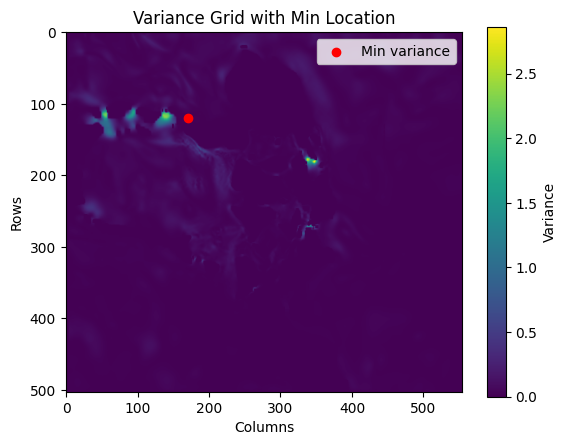

In [202]:
# Plotting the min variance
import matplotlib.pyplot as plt

plt.imshow(variance_grid, cmap='viridis')
plt.colorbar(label='Variance')
plt.scatter([x[0]], [y[0]], color='red', label='Min variance')
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.legend()
plt.title('Variance Grid with Min Location')
plt.show()

In [203]:
# Identifying the max variance
max_variance = np.max(variance_grid_l)
y, x = np.where(variance_grid == max_variance)
y_max_km = y[0]*3
x_max_km = x[0]*3

In [180]:
import numpy as np

# Suppose `u` is your 3D array containing x-axis velocities
# u = np.random.randn(t_len, y_len, x_len)  # Example placeholder

max_value = np.max(data_3d)
max_index = np.unravel_index(np.argmax(data_3d), data_3d.shape)
t_max, y_max, x_max = max_index

print(f"Maximum x-axis velocity: {max_value}")
print(f"Location in grid: hour ={t_max*3}, y KM={y_max*3}, x KM={x_max}")


Maximum x-axis velocity: 6.384113340754532
Location in grid: hour =66, y KM=540, x KM=347


In [196]:
pd.DataFrame(data_3d[22,:, :])

,0,1,2,3,4,5,6,7,8,9,...,545,546,547,548,549,550,551,552,553,554
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.418990,0.415380,0.415810,0.420280,0.424760,0.430890,...,0.128100,0.117920,0.112340,0.106750,0.105360,0.108170,0.110980,0.093669,0.056219,0.018748
2,0.0,0.0,0.0,0.270540,1.011785,1.008678,0.990803,0.961733,0.937799,0.933847,...,0.337167,0.310072,0.291887,0.273785,0.263226,0.260627,0.258714,0.215028,0.129043,0.026552
3,0.0,0.0,0.0,0.277920,1.049332,1.054260,1.045228,1.023867,1.004762,0.994885,...,0.359203,0.333960,0.315111,0.296370,0.283632,0.277533,0.272404,0.225188,0.128717,0.000000
4,0.0,0.0,0.0,0.285300,1.086897,1.099827,1.099753,1.087133,1.075164,1.060534,...,0.381264,0.357862,0.338366,0.318958,0.304075,0.294528,0.286275,0.235576,0.135513,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0.0,0.0,0.0,0.050221,0.109817,0.112610,0.115866,0.119577,0.123298,0.125566,...,0.564887,0.574314,0.585651,0.597352,0.593881,0.575145,0.556633,0.456258,0.233303,0.000000
499,0.0,0.0,0.0,0.049974,0.108877,0.110345,0.112801,0.116265,0.119734,0.122382,...,0.554080,0.564249,0.581568,0.599586,0.601362,0.586444,0.571532,0.470102,0.240078,0.033816
500,0.0,0.0,0.0,0.041539,0.090340,0.091010,0.092729,0.095503,0.098285,0.100651,...,0.457241,0.466073,0.483105,0.500878,0.504507,0.493497,0.482481,0.397487,0.238536,0.079529
501,0.0,0.0,0.0,0.024921,0.051938,0.052352,0.053409,0.055113,0.056816,0.058357,...,0.222713,0.228939,0.241201,0.253819,0.257364,0.251609,0.245857,0.202496,0.121509,0.040511


In [191]:
data_3d[22, y_max, x_max]

6.384113340754532

In [ ]:
pd.read_csv(data_f_list_sorted[1]) # y is 503, x is 555

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554
0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,0,0.0,-0.117380,-0.227090,-0.211750,-0.200650,-0.193810,-0.186970,-0.165960,...,0.21734,0.18408,0.15080,0.11751,0.093763,0.079559,0.065354,0.048544,0.029132,0.009713
3,0,0,0.0,-0.122770,-0.238660,-0.224890,-0.213370,-0.204100,-0.194830,-0.175970,...,0.22303,0.19156,0.15950,0.12745,0.100790,0.079544,0.058297,0.039726,0.015890,0.000000
4,0,0,0.0,-0.128160,-0.250220,-0.238030,-0.226080,-0.214390,-0.202700,-0.185990,...,0.22872,0.19904,0.16821,0.13738,0.107810,0.079534,0.051244,0.030911,0.012364,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0,0,0.0,-0.011248,-0.022629,-0.022895,-0.026429,-0.033231,-0.040034,-0.044156,...,-0.53419,-0.52773,-0.52222,-0.51671,-0.516460,-0.521470,-0.526490,-0.440860,-0.176360,0.000000
499,0,0,0.0,-0.012616,-0.025207,-0.025158,-0.029298,-0.037631,-0.045965,-0.050278,...,-0.54247,-0.53488,-0.52796,-0.52104,-0.519020,-0.521900,-0.524780,-0.438540,-0.175440,0.000000
500,0,0,0.0,-0.011082,-0.022079,-0.021906,-0.025609,-0.033190,-0.040772,-0.044445,...,-0.45547,-0.44868,-0.44232,-0.43597,-0.433550,-0.435070,-0.436570,-0.364460,-0.218710,-0.072915
501,0,0,0.0,-0.006649,-0.013246,-0.013142,-0.015364,-0.019912,-0.024459,-0.026664,...,-0.27325,-0.26917,-0.26535,-0.26155,-0.260110,-0.261000,-0.261910,-0.218640,-0.131200,-0.043740


In [181]:
data_3d.shape

(100, 503, 555)